In [1]:
!pip install pyaurn

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import requests
import pyaurn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]
import os

from concurrent.futures import ThreadPoolExecutor, wait
#from google.colab import drive
from shutil import make_archive, move
from math import sin, cos
from IPython.display import clear_output

In [3]:
metadata = pyaurn.importMeta().set_index("site_id")

In [4]:
display(metadata)
filtered_metadata = metadata.drop(["site_name", "parameter", "Parameter_name", "start_date", "end_date", "ratified_to", "zone", "agglomeration", "local_authority"], axis=1)

,site_name,location_type,latitude,longitude,parameter,Parameter_name,start_date,end_date,ratified_to,zone,agglomeration,local_authority
site_id,,,,,,,,,,,,
ABD,Aberdeen,Urban Background,57.157360,-2.094278,O3,Ozone,2003-08-01,2021-09-20,2021-09-20,North East Scotland,NaN,Aberdeen City
ABD9,Aberdeen Erroll Park,Urban Background,57.157400,-2.094770,O3,Ozone,2021-10-01,ongoing,2022-09-30,North East Scotland,NaN,Aberdeen City
ABD7,Aberdeen Union Street Roadside,Urban Traffic,57.144555,-2.106472,NO,Nitric oxide,2008-01-01,ongoing,2022-09-30,North East Scotland,NaN,Aberdeen City
ABD8,Aberdeen Wellington Road,Urban Traffic,57.133888,-2.094198,NO,Nitric oxide,2016-02-09,ongoing,2022-09-30,North East Scotland,NaN,Aberdeen City
ARM6,Armagh Roadside,Urban Traffic,54.353728,-6.654558,NO,Nitric oxide,2009-01-01,ongoing,2022-09-30,Northern Ireland,NaN,Armagh
...,...,...,...,...,...,...,...,...,...,...,...,...
WRAY,Wray,Rural Background,54.104666,-2.584182,O3,Ozone,1985-04-01,1988-02-29,1988-02-29,North West & Merseyside,NaN,Lancaster
WREX,Wrexham,Urban Traffic,53.042282,-3.002829,NO,Nitric oxide,2002-03-06,ongoing,2022-09-30,North Wales,NaN,Wrexham
YW,Yarner Wood,Rural Background,50.597600,-3.716510,O3,Ozone,1987-06-26,ongoing,2022-09-30,South West,NaN,Teignbridge


In [5]:
def get_raw_data(name, year_range):
    data = pyaurn.importAURN(name, year_range).reset_index()
    data["site_id"] = name
    return data

In [13]:
def prepare_site_data(data):
  try:
    if "temp" in data.columns:
      data["date"] = data["date"].apply(lambda e: e.timestamp())
      data = data.dropna()
      data = data.merge(filtered_metadata, on="site_id").drop(["site_id", "site"], axis=1)
      return data
  except KeyError:
    return

In [10]:
display(metadata.index)
with ThreadPoolExecutor(min(32, os.cpu_count() + 4)) as executor:
  all_data = [executor.submit(get_raw_data, name, range(2021, 2022)) for name in metadata.index]
  all_data = wait(all_data)
  clear_output()

In [11]:
raw_data = [item.result() for item in all_data.done]
display(raw_data[0])

,date,O3,NO,NO2,NOXasNO2,SO2,PM10,PM2.5,wd,ws,temp,site,code,site_id
0,2021-01-01 00:00:00,15.38948,NaN,NaN,NaN,0.60151,39.750,35.047,311.3,2.2,-2.5,Birmingham Ladywood,BMLD,BMLD
1,2021-01-01 01:00:00,29.23298,2.17612,22.67000,26.00667,0.24061,29.700,26.227,313.3,2.2,-2.9,Birmingham Ladywood,BMLD,BMLD
2,2021-01-01 02:00:00,26.03563,2.48700,22.09841,25.91175,0.30076,24.500,22.241,321.3,2.3,-3.0,Birmingham Ladywood,BMLD,BMLD
3,2021-01-01 03:00:00,24.77074,1.80307,21.29624,24.06091,0.12030,23.000,20.826,331.9,2.3,-3.0,Birmingham Ladywood,BMLD,BMLD
4,2021-01-01 04:00:00,22.71529,1.39894,20.49219,22.63719,0.00000,21.150,19.387,333.7,2.3,-2.9,Birmingham Ladywood,BMLD,BMLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,48.92069,1.80532,20.54725,23.31536,NaN,8.875,5.873,206.5,3.8,10.3,Birmingham Ladywood,BMLD,BMLD
8756,2021-12-31 20:00:00,60.56401,0.53272,8.16882,8.98564,NaN,12.275,8.066,208.2,4.2,10.2,Birmingham Ladywood,BMLD,BMLD
8757,2021-12-31 21:00:00,53.09914,0.50312,7.03187,7.80332,NaN,17.525,11.745,213.7,5.6,10.0,Birmingham Ladywood,BMLD,BMLD
8758,2021-12-31 22:00:00,53.28694,0.32555,6.07453,6.57370,NaN,13.525,9.670,219.0,5.9,10.5,Birmingham Ladywood,BMLD,BMLD


In [14]:
usable_data = raw_data.copy()
display(usable_data[0])

,date,O3,NO,NO2,NOXasNO2,SO2,PM10,PM2.5,wd,ws,temp,site,code,site_id
0,2021-01-01 00:00:00,15.38948,NaN,NaN,NaN,0.60151,39.750,35.047,311.3,2.2,-2.5,Birmingham Ladywood,BMLD,BMLD
1,2021-01-01 01:00:00,29.23298,2.17612,22.67000,26.00667,0.24061,29.700,26.227,313.3,2.2,-2.9,Birmingham Ladywood,BMLD,BMLD
2,2021-01-01 02:00:00,26.03563,2.48700,22.09841,25.91175,0.30076,24.500,22.241,321.3,2.3,-3.0,Birmingham Ladywood,BMLD,BMLD
3,2021-01-01 03:00:00,24.77074,1.80307,21.29624,24.06091,0.12030,23.000,20.826,331.9,2.3,-3.0,Birmingham Ladywood,BMLD,BMLD
4,2021-01-01 04:00:00,22.71529,1.39894,20.49219,22.63719,0.00000,21.150,19.387,333.7,2.3,-2.9,Birmingham Ladywood,BMLD,BMLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,48.92069,1.80532,20.54725,23.31536,NaN,8.875,5.873,206.5,3.8,10.3,Birmingham Ladywood,BMLD,BMLD
8756,2021-12-31 20:00:00,60.56401,0.53272,8.16882,8.98564,NaN,12.275,8.066,208.2,4.2,10.2,Birmingham Ladywood,BMLD,BMLD
8757,2021-12-31 21:00:00,53.09914,0.50312,7.03187,7.80332,NaN,17.525,11.745,213.7,5.6,10.0,Birmingham Ladywood,BMLD,BMLD
8758,2021-12-31 22:00:00,53.28694,0.32555,6.07453,6.57370,NaN,13.525,9.670,219.0,5.9,10.5,Birmingham Ladywood,BMLD,BMLD


In [15]:
retrieved_data = [prepare_site_data(item) for item in usable_data]
display(retrieved_data[0])

,date,O3,NO,NO2,NOXasNO2,SO2,PM10,PM2.5,wd,ws,temp,code,location_type,latitude,longitude
0,1.609463e+09,29.23298,2.17612,22.67000,26.00667,0.24061,29.700,26.227,313.3,2.2,-2.9,BMLD,Urban Background,52.481346,-1.918235
1,1.609466e+09,26.03563,2.48700,22.09841,25.91175,0.30076,24.500,22.241,321.3,2.3,-3.0,BMLD,Urban Background,52.481346,-1.918235
2,1.609470e+09,24.77074,1.80307,21.29624,24.06091,0.12030,23.000,20.826,331.9,2.3,-3.0,BMLD,Urban Background,52.481346,-1.918235
3,1.609474e+09,22.71529,1.39894,20.49219,22.63719,0.00000,21.150,19.387,333.7,2.3,-2.9,BMLD,Urban Background,52.481346,-1.918235
4,1.609477e+09,17.49763,1.11915,22.67711,24.39312,0.06015,24.800,22.712,340.4,2.4,-2.5,BMLD,Urban Background,52.481346,-1.918235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7112,1.639584e+09,34.69520,2.12975,28.60414,31.86971,0.45524,13.350,9.127,252.8,3.9,9.5,BMLD,Urban Background,52.481346,-1.918235
7113,1.639588e+09,31.12708,3.43127,31.15456,36.41576,0.32517,15.375,10.849,240.6,3.4,9.7,BMLD,Urban Background,52.481346,-1.918235
7114,1.639591e+09,35.07079,4.34825,27.47552,34.14274,0.52028,11.400,7.995,228.8,3.2,8.5,BMLD,Urban Background,52.481346,-1.918235
7115,1.639595e+09,30.65759,3.87497,31.80016,37.74169,0.39021,12.125,8.184,228.6,2.8,7.9,BMLD,Urban Background,52.481346,-1.918235


In [47]:
def split_dataset(dataset):
    dataset_len = len(dataset)
    train_end = round(dataset_len * 0.7)
    val_end = round(dataset_len * 0.85)

    train_dataset = dataset.iloc[0:train_end].copy()
    # 15% of original dataset (0.3 * 0.5)
    val_dataset = dataset.iloc[train_end:val_end].copy()
    # Take what's left
    test_dataset = dataset.iloc[val_end:dataset_len].copy()
    
    return { "train": train_dataset, "val": val_dataset, "test": test_dataset }

In [73]:
def compile_model(train_dataset: pd.DataFrame, val_dataset: pd.DataFrame, test_dataset: pd.DataFrame):
    # Define the columns we know all datasets have
    target = "temp"
    common_numeric = ["date", "latitude", "longitude"]
    common_text = ["location_type", "code"]
    # Work out what other columns/metrics are in this dataset, assume they are numeric
    other_metrics = train_dataset.columns.difference(common_numeric + common_text + [target])
    numeric_cols = common_numeric + other_metrics.to_list()
    print(train_dataset.info())
    print(numeric_cols, train_dataset.columns)
    
    numeric_inputs = tf.keras.layers.Input(len(numeric_cols))
    normalisation = tf.keras.layers.Normalization()
    normalisation.adapt(train_dataset[numeric_cols])
    normalisation = normalisation(numeric_inputs)

    dense = tf.keras.layers.Dense(32, activation="relu")(normalisation)

    outputs = tf.keras.layers.Dense(1)(dense)

    model = tf.keras.Model(inputs=numeric_inputs, outputs=outputs)
    model.summary()
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
        loss="mean_squared_error",
        metrics = ["mean_absolute_error"]
    )

    history = model.fit(
        train_dataset[numeric_cols],
        train_dataset["temp"],
        epochs=10,
        validation_data=(val_dataset[numeric_cols], val_dataset["temp"])
    )

    plt.plot(history.history["loss"])
    plt.show()

    predictions = model.predict(test_dataset[numeric_cols]).flatten()

    display(predictions)
    plt.plot(test_dataset["temp"].to_list(), label="Truth")
    plt.plot(predictions, label="Predictions")
    plt.legend()
    
    return model



In [71]:
def get_trained_model(dataset):
    splits = split_dataset(dataset)
    model = compile_model(splits["train"], splits["val"], splits["test"])
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4981
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           4982 non-null   float64 
 1   O3             4982 non-null   float64 
 2   NO             4982 non-null   float64 
 3   NO2            4982 non-null   float64 
 4   NOXasNO2       4982 non-null   float64 
 5   SO2            4982 non-null   float64 
 6   PM10           4982 non-null   float64 
 7   PM2.5          4982 non-null   float64 
 8   wd             4982 non-null   float64 
 9   ws             4982 non-null   float64 
 10  temp           4982 non-null   float64 
 11  code           4982 non-null   category
 12  location_type  4982 non-null   object  
 13  latitude       4982 non-null   float64 
 14  longitude      4982 non-null   float64 
dtypes: category(1), float64(13), object(1)
memory usage: 588.8+ KB
None
['date', 'latitude', 'longitude', 'NO', 'NO2', 'NOXasNO

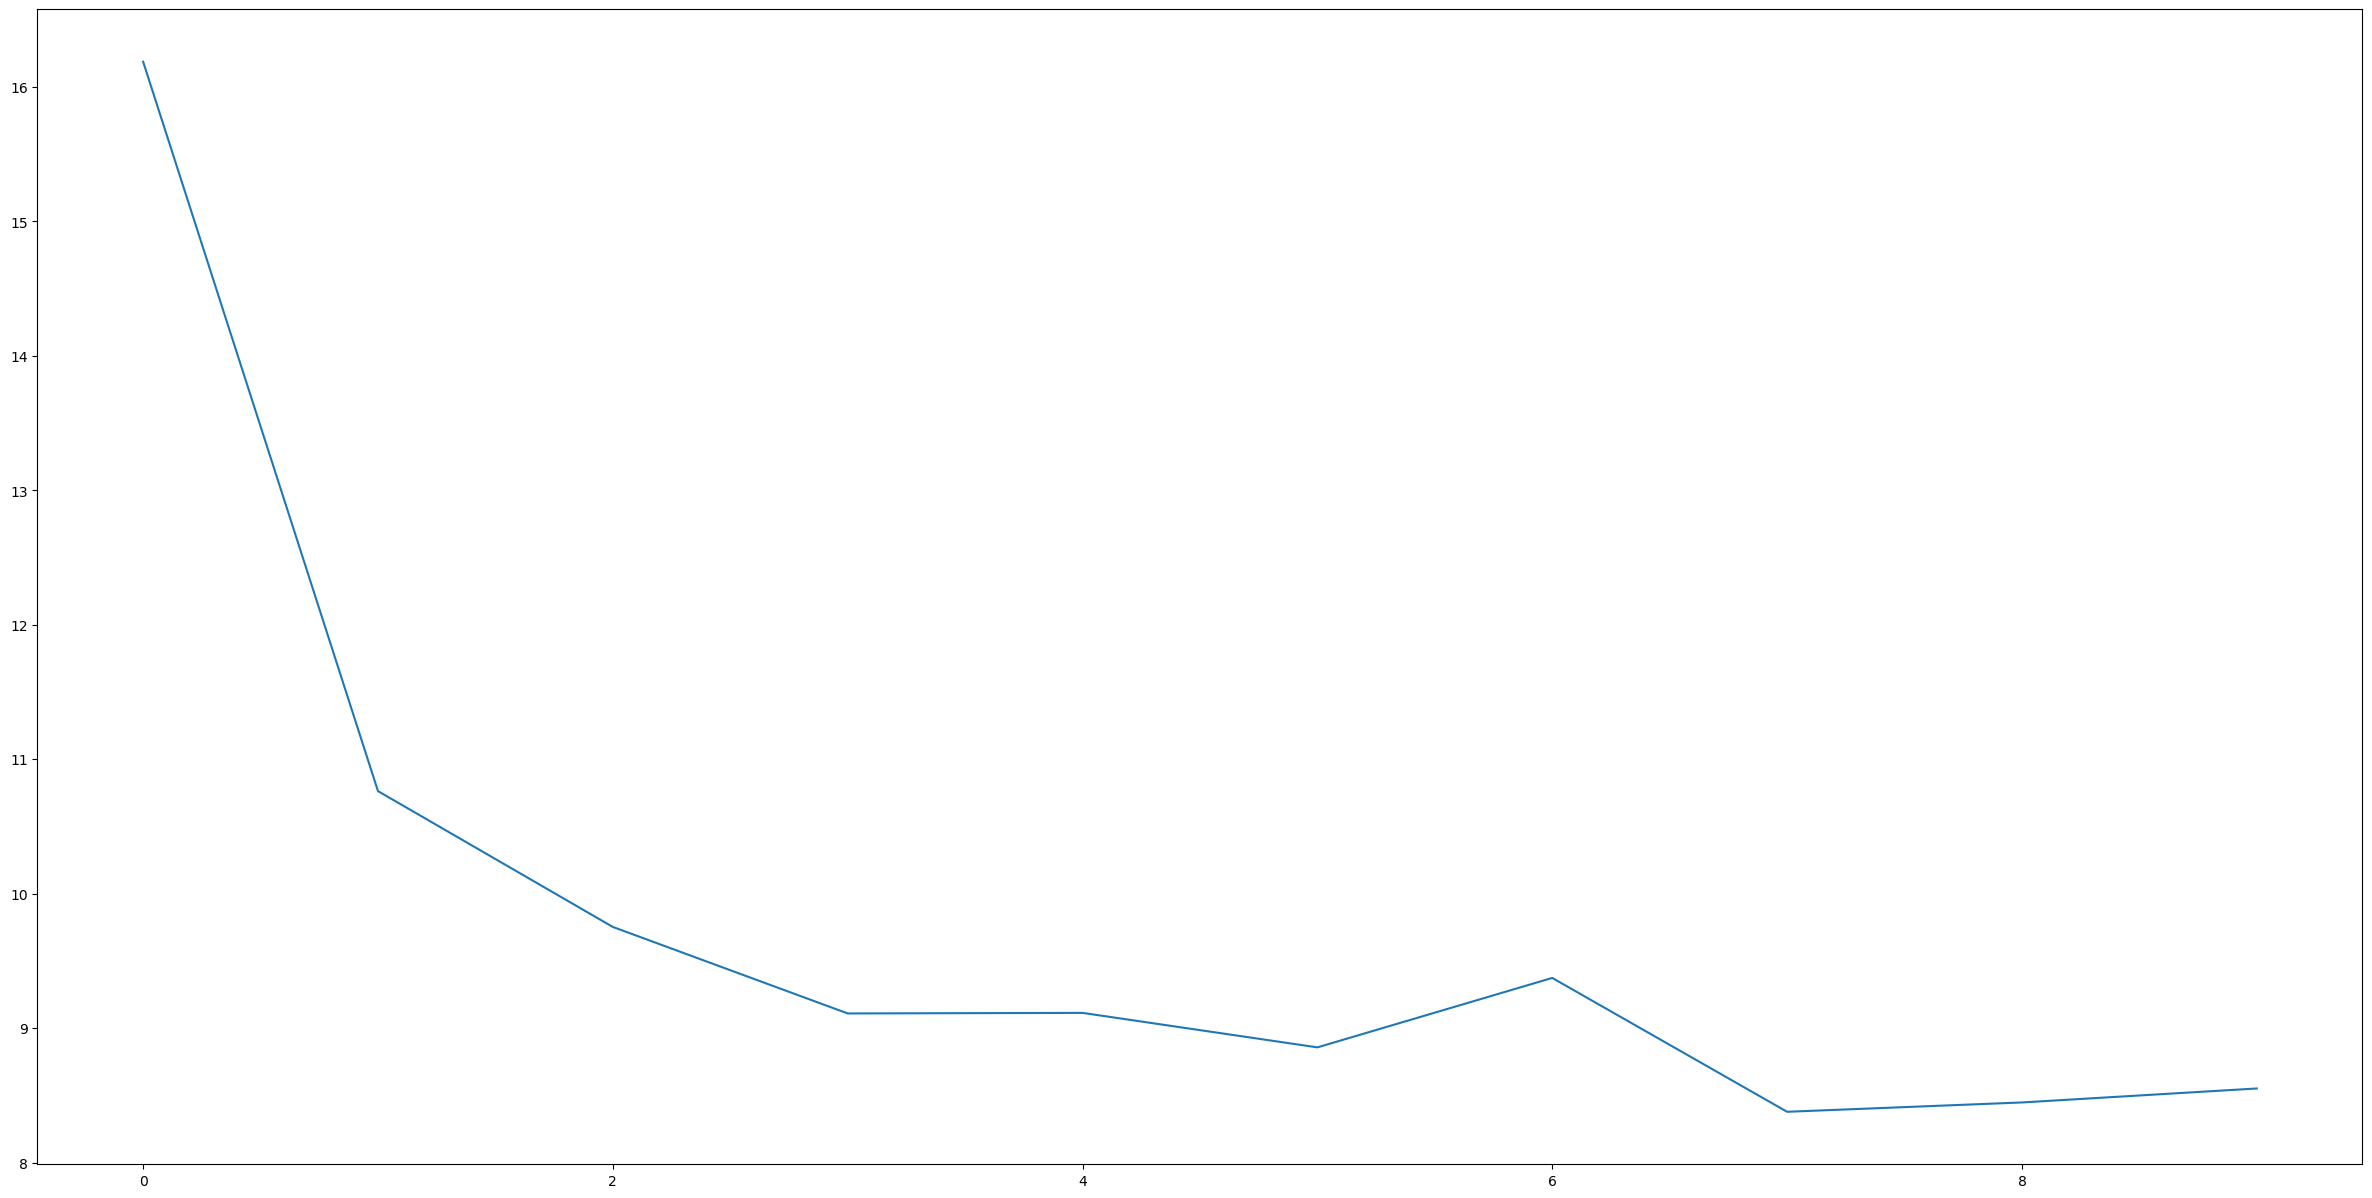

34/34 [==============================] - 0s 2ms/step


array([8.192206 , 7.9161286, 7.9311595, ..., 3.4524598, 3.453364 ,
       4.4341793], dtype=float32)

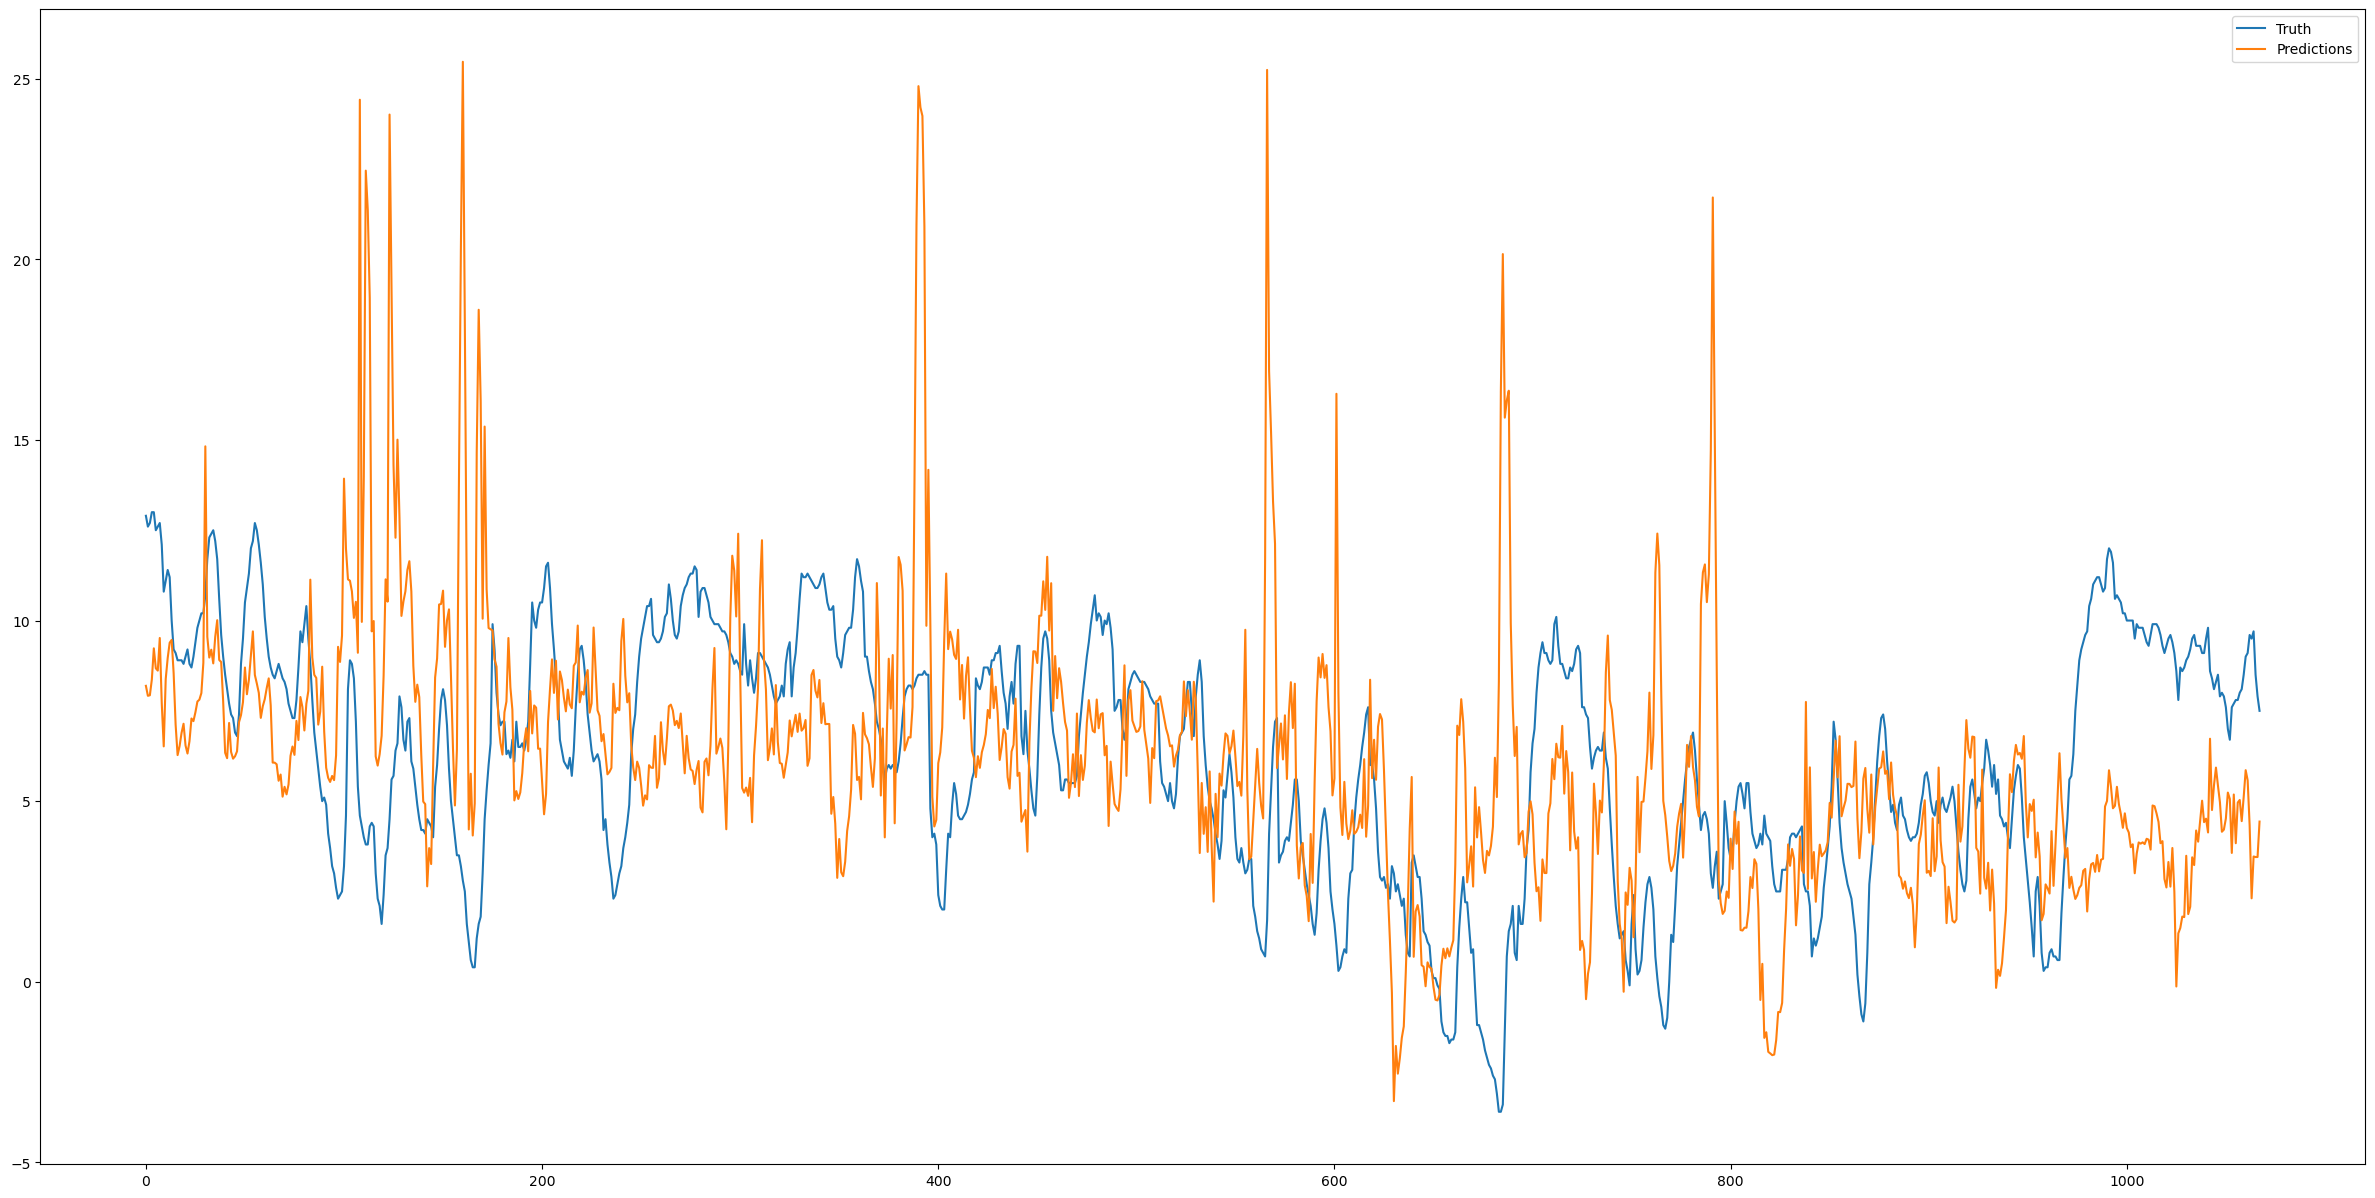

In [74]:
get_trained_model(retrieved_data[0])

In [17]:
#drive.mount("/content/gdrive", force_remount=True)
model.save("/content/comp3000model")
zip_location = make_archive("model", "zip", "/content/comp3000model")
#move(zip_location, "/content/gdrive/MyDrive/comp3000model/model.zip")
#drive.flush_and_unmount()

INFO:tensorflow:Assets written to: /content/comp3000model\assets
